In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
file_path = 'Twitter_Data.csv'
df = pd.read_csv(file_path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [9]:
df.shape

(162980, 2)

In [10]:
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


##DATA PREPROCESSING:

In [10]:
print(df.isnull().sum())
df.dropna(inplace=True)     #checking for missing values

clean_text    0
category      0
dtype: int64


In [11]:

                                                     #Train/Test samples that are used to train/test your model.

X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (130384,)
X_test shape: (32596,)
y_train shape: (130384,)
y_test shape: (32596,)


In [12]:

vectorizer = TfidfVectorizer(max_features=10000) #vectorizing text using TF-IDF( to convert text into numerical vectors)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [59]:
print(vectorizer.get_feature_names_out()[:50])

['000' '100' '1000' '10000' '100000' '1000s' '100s' '100th' '101' '1015'
 '10279' '103' '104' '1068' '107' '108' '10cr' '10k' '10th' '10yrs' '111'
 '1145' '11th' '120' '1200' '12000' '125' '126' '12k' '12th' '130' '13000'
 '130cr' '134' '135' '140' '14000' '150' '1500' '15000' '1500000' '1520'
 '157200000' '15l' '15lac' '15lacs' '15lakh' '15lakhs' '160' '1600']


In [16]:
# View first 5 vectorized rows as arrays
print(X_train_vec[:5].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
          #Cleaning the text

def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', text)  # Remove Retweet "RT"
    text = re.sub(r'http\S+', '', text)   # Remove URLs
    text = re.sub(r'@\w+', '', text)      # Remove mentions
    text = re.sub(r'#', '', text)         # Remove hashtag symbol only
    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation/symbols
    text = re.sub(r'\d+', '', text)       # Remove numbers
    text = text.lower().strip()           # Lowercase & trim spaces
    return text

df['cleaned'] = df['clean_text'].apply(clean_text)

In [18]:
print(df[['clean_text', 'cleaned']].head())

                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                             cleaned  
0  when modi promised minimum government maximum ...  
1  talk all the nonsense and continue all the dra...  
2  what did just say vote for modi  welcome bjp t...  
3  asking his supporters prefix chowkidar their n...  
4  answer who among these the most powerful world...  


In [14]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Ensure the input is a string before splitting
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word not in stop_words])
    else:
        # Handle non-string inputs
        return ''
df['cleaned_text'] = df['cleaned'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to C:\Users\NEW
[nltk_data]     DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(df[['cleaned', 'cleaned_text']].head())

                                             cleaned  \
0  when modi promised minimum government maximum ...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                        cleaned_text  
0  modi promised minimum government maximum gover...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporters prefix chowkidar names modi ...  
4  answer among powerful world leader today trump...  


In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


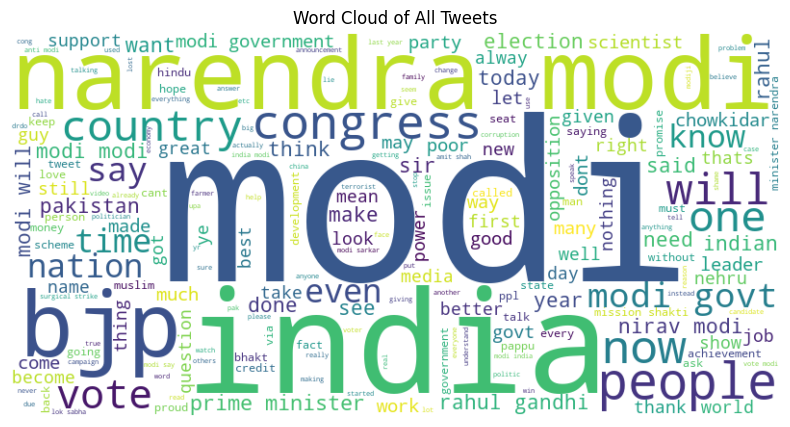

In [ ]:
# Visualizing the cleaned text with a word cloud

all_text = " ".join(df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

In [15]:
#Apply Tokenisation
# Download tokenizer data (only needed once)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\NEW
[nltk_data]     DELL/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
def tokenize_text(text):
    return word_tokenize(text)
df['tokens'] = df['clean_text'].apply(tokenize_text)
print(df[['clean_text', 'tokens']].head())


                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                              tokens  
0  [when, modi, promised, “, minimum, government,...  
1  [talk, all, the, nonsense, and, continue, all,...  
2  [what, did, just, say, vote, for, modi, welcom...  
3  [asking, his, supporters, prefix, chowkidar, t...  
4  [answer, who, among, these, the, most, powerfu...  


In [17]:
  #apply stemming — which reduces words to their root form (e.g., “playing” ➝ “play”)

  
stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['processed_text'] = df['cleaned_text'].apply(stem_text)


In [41]:
print(df[['cleaned_text', 'processed_text']].head())


                                        cleaned_text  \
0  modi promised minimum government maximum gover...   
1             talk nonsense continue drama vote modi   
2  say vote modi welcome bjp told rahul main camp...   
3  asking supporters prefix chowkidar names modi ...   
4  answer among powerful world leader today trump...   

                                      processed_text  
0  modi promis minimum govern maximum govern expe...  
1               talk nonsens continu drama vote modi  
2  say vote modi welcom bjp told rahul main campa...  
3  ask support prefix chowkidar name modi great s...  
4  answer among power world leader today trump pu...  


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
sample_df = df.sample(n=1000, random_state=42)  # adjust sample size as needed

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

X_sample = vectorizer.fit_transform(sample_df['clean_text']).toarray()

In [16]:
# Create DataFrame for correlation
tfidf_df = pd.DataFrame(X_sample, columns=vectorizer.get_feature_names_out())
tfidf_df['category'] = sample_df['category'].reset_index(drop=True)

In [47]:
# Correlation computation
correlation_with_sentiment = tfidf_df.corr()['category'].drop('category').sort_values()

C:\Users\NEW DELL\AppData\Local\Temp\ipykernel_25744\1204429055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


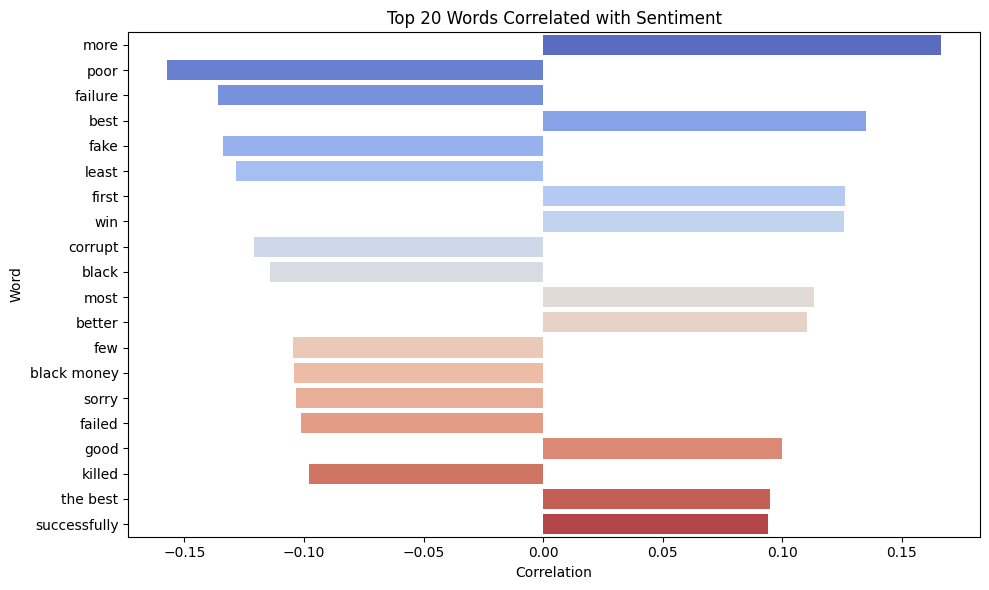

In [51]:
import seaborn as sns
top_corr = correlation_with_sentiment.abs().sort_values(ascending=False).head(20)
top_corr = correlation_with_sentiment.loc[top_corr.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top 20 Words Correlated with Sentiment")
plt.xlabel("Correlation")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

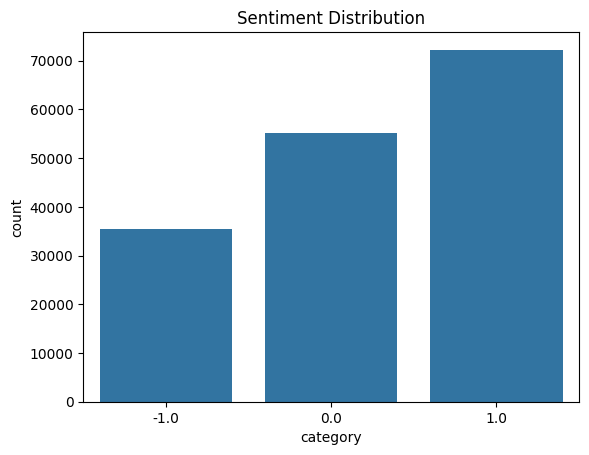

In [60]:
# Changed 'sentiment' to 'category' as the column containing sentiment labels is named 'category'
sns.countplot(data=df, x='category')
plt.title('Sentiment Distribution')
plt.show()

##CLASSIFICATION

In [18]:
lr_model = LogisticRegression(max_iter=1000)

In [19]:
lr_model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
X_train_prediction = lr_model.predict(X_train_vec)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.940065196548418


In [58]:
X_test_prediction = lr_model.predict(X_test_vec)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of the testing data : ', testing_data_accuracy)

Accuracy score of the testing data :  0.9265508989384549


In [59]:
lr_acc = accuracy_score(y_test, X_test_prediction)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.9266


#Out of 32,594 tweets, your LogisticRegression model correctly predicted ~30,312 tweets.

In [61]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=42)
rf_model.fit(X_train_vec, y_train)
rf_pred = rf_model.predict(X_test_vec)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.650303736884089


In [62]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_pred)
print("Multinomial Naive Bayes Accuracy:", nb_acc)

Multinomial Naive Bayes Accuracy: 0.7365159231760446


In [63]:
print("\n🔍 Model Accuracy Comparison:")
print(f"Logistic Regression     : {lr_acc:.4f}")
print(f"Random Forest Classifier: {rf_acc:.4f}")
print(f"Multinomial Naive Bayes : {nb_acc:.4f}")



🔍 Model Accuracy Comparison:
Logistic Regression     : 0.9266
Random Forest Classifier: 0.6503
Multinomial Naive Bayes : 0.7365


In [ ]:
##CLASSIFICATION REPORTS
# Predict on test data
lr_pred = lr_model.predict(X_test_vec)
rf_pred = rf_model.predict(X_test_vec)
nb_pred = nb_model.predict(X_test_vec)

# Define class labels
target_names = ['Negative', 'Neutral', 'Positive']

# Print reports
print("🔷 Logistic Regression Report:\n")
print(classification_report(y_test, lr_pred, target_names=target_names))

print("\n🔶 Random Forest Classifier Report:\n")
print(classification_report(y_test, rf_pred, target_names=target_names))

print("\n🟢 Multinomial Naive Bayes Report:\n")
print(classification_report(y_test, nb_pred, target_names=target_names))

🔷 Logistic Regression Report:

              precision    recall  f1-score   support

    Negative       0.91      0.83      0.87      7152
     Neutral       0.92      0.98      0.95     11067
    Positive       0.94      0.94      0.94     14375

    accuracy                           0.93     32594
   macro avg       0.92      0.91      0.92     32594
weighted avg       0.93      0.93      0.93     32594


🔶 Random Forest Classifier Report:

              precision    recall  f1-score   support

    Negative       0.97      0.06      0.11      7152
     Neutral       0.74      0.68      0.71     11067
    Positive       0.60      0.92      0.73     14375

    accuracy                           0.65     32594
   macro avg       0.77      0.55      0.52     32594
weighted avg       0.73      0.65      0.59     32594


🟢 Multinomial Naive Bayes Report:

              precision    recall  f1-score   support

    Negative       0.91      0.42      0.57      7152
     Neutral       0.88  

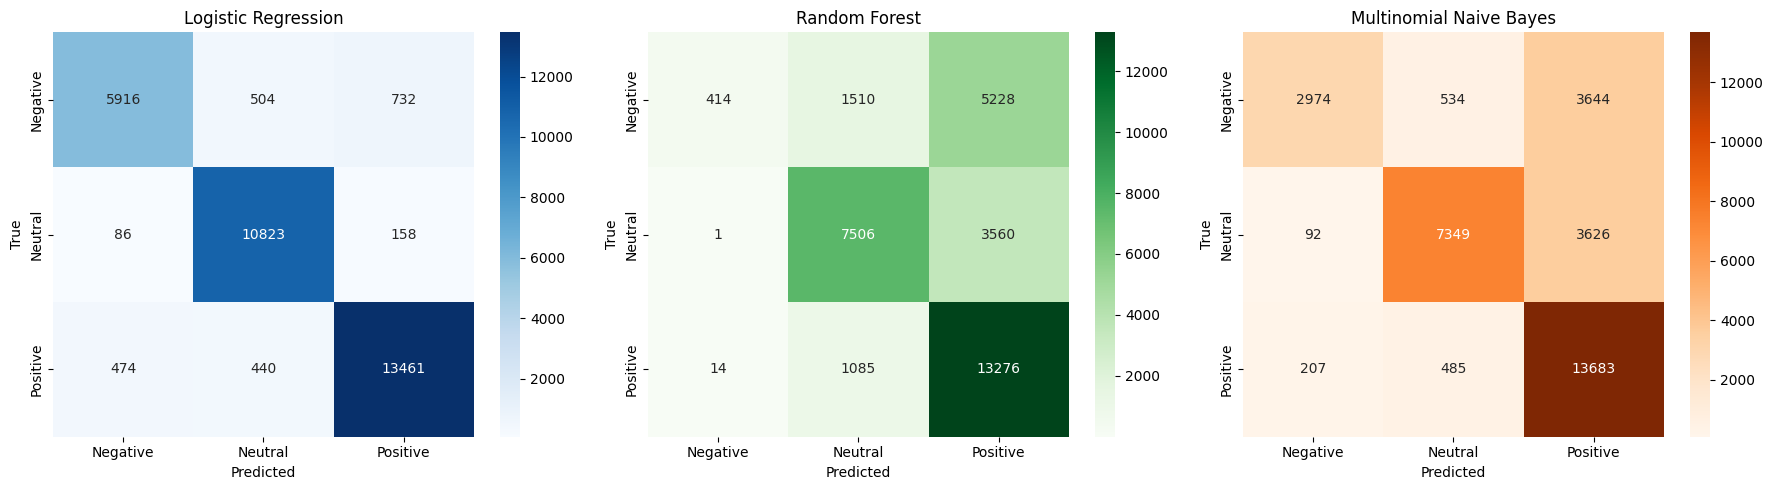

In [66]:
# confusion_matrix


# Predictions (if not already done)
lr_pred = lr_model.predict(X_test_vec)
rf_pred = rf_model.predict(X_test_vec)
nb_pred = nb_model.predict(X_test_vec)

# Define class labels
labels = ['Negative', 'Neutral', 'Positive']

# Create confusion matrices
cm_lr = confusion_matrix(y_test, lr_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_nb = confusion_matrix(y_test, nb_pred)

# Plot all 3 in a row
plt.figure(figsize=(18, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")

# Random Forest
plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")

# Naive Bayes
plt.subplot(1, 3, 3)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title("Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


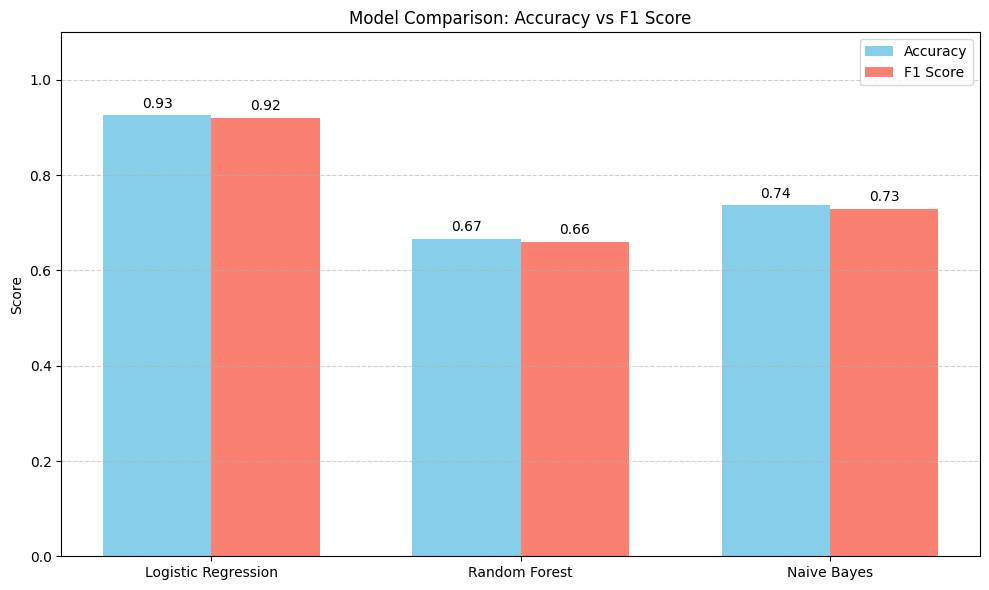

In [67]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

# Accuracy and F1-scores (update with your actual F1 if you have)
accuracies = [0.9254, 0.6665, 0.7366]
f1_scores = [0.92, 0.66, 0.73]  # ← Replace with your exact macro or weighted F1-scores if available

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, accuracies, width=bar_width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + bar_width/2, f1_scores, width=bar_width, label='F1 Score', color='salmon')

# Add value labels
for bar in bars1 + bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Chart settings
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Saving the model

In [20]:
filename='logistic_model.pkl'
pickle.dump(lr_model,open(filename,'wb'))

In [21]:
#loading the saved model
loaded_model=pickle.load(open('logistic_model.pkl','rb'))

In [22]:
filename='vectorizer.pkl'
pickle.dump(vectorizer,open(filename,'wb'))

In [23]:
loaded_vectorizer=pickle.load(open('vectorizer.pkl','rb'))

In [27]:
print("Vectorizer feature count:", len(vectorizer.get_feature_names_out()))
print("Model input features:",lr_model.n_features_in_)


Vectorizer feature count: 10000
Model input features: 10000


In [25]:
import pickle

with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

Making predictions

In [77]:
X_new=X_test_vec[12]
print(y_test[12])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")



1.0
[1.]
The comment is Positive


In [78]:
X_new=X_test_vec[30]
print(y_test.iloc[30])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")


0.0
[0.]
The comment is Neutral


In [79]:
X_new=X_test_vec[105]
print(y_test.iloc[105])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")

-1.0
[-1.]
The comment is Negative


In [80]:
X_new=X_test_vec[50]
print(y_test.iloc[50])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")

1.0
[1.]
The comment is Positive


In [81]:
X_new=X_test_vec[101]
print(y_test.iloc[101])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")


1.0
[1.]
The comment is Positive


In [82]:
X_new=X_test_vec[230]
print(y_test.iloc[230])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")

-1.0
[-1.]
The comment is Negative


In [83]:
X_new=X_test_vec[133]
print(y_test.iloc[133])

prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The comment is Neutral")
elif prediction[0] == 1:
    print("The comment is Positive")
else:
    print("The comment is Negative")

0.0
[0.]
The comment is Neutral
